Modélise une expérience avec deux issues possibles (succès ou échec).
Paramètre : p (probabilité de succès).
Exemple : Lancer d’une pièce équilibrée (succès = face).

Activité:
Une entreprise fabrique des composants électroniques avec un taux de défectuosité de 5 %.
Ouvrir le fichier Dataset_composants_defectueux.csv
Estimer p la probabilité qu’un composant soit défectueux.

La probabilité qu'un composant soit défectueux est de 7.22%


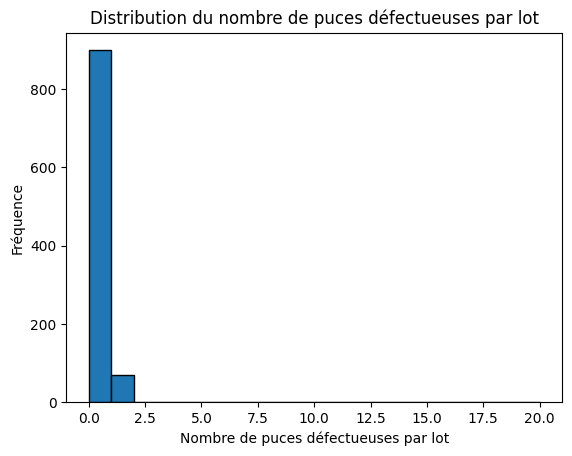

In [22]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('Dataset_composants_defectueux.csv', skip_blank_lines=True)
# Calculate the probability of a defective component
p = df['defectueux'].mean()
print(f"La probabilité qu'un composant soit défectueux est de {p:.2%}")
#nombre de pieces defectueuses ou non valuescount
df['defectueux'].value_counts()

plt.hist(df['defectueux'], bins=range(0, 21), edgecolor='black')
plt.xlabel('Nombre de puces défectueuses par lot')
plt.ylabel('Fréquence')
plt.title('Distribution du nombre de puces défectueuses par lot')
plt.show()



Contexte:
Une entreprise fabrique des puces électroniques. Lors des contrôles qualité, chaque lot de production contient 20 puces, et chaque puce a une probabilité de 10 % d’être défectueuse. On veut estimer combien de puces défectueuses apparaissent en moyenne par lot en analysant 500 lots.

Lire le fichier Dataset_lot_puce_defectueuses.csv
Estimation globale : Quelle est la proportion moyenne de puces défectueuses dans l’ensemble des lots ?
Variabilité : Quelle est la distribution du nombre de puces défectueuses par lot (histogramme) ?
Probabilité d’un lot problématique : Quelle est la probabilité qu’un lot contienne au moins 5 puces défectueuses ?
Décision qualité : Si l’entreprise rejette tout lot contenant 5 puces défectueuses ou plus, quel pourcentage des lots sera rejeté ?
Amélioration : En supposant que l’entreprise veut réduire le taux de rejet à 5 %, quel taux de défectuosité maximal une puce devrait avoir ? (Tester plusieurs valeurs de p)



In [36]:
#lire le fichier csv
df2= pd.read_csv('Dataset_lot_puce_defectueuses.csv', sep=",", skip_blank_lines=True)


In [37]:
df2.sample(5)

,id_puce,lot_id,défectueux
9249,9250,463,Non défectueux
4289,4290,215,Défectueux
3030,3031,152,Non défectueux
5232,5233,262,Non défectueux
4650,4651,233,Non défectueux


In [38]:
# Calculer la proportion moyenne de puces défectueuses
proportion_defectueuse = (df2['défectueux'] == 'Défectueux').mean()
print(f"La proportion moyenne de puces défectueuses dans l’ensemble des lots est de {proportion_defectueuse:.2%}")

La proportion moyenne de puces défectueuses dans l’ensemble des lots est de 9.95%


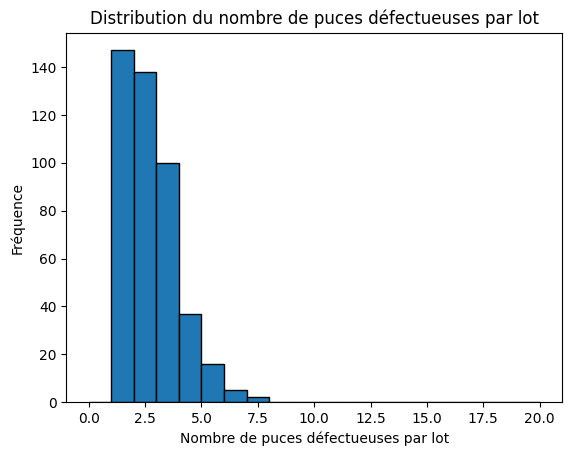

In [39]:
# Calculate the number of defective chips per lot
defective_per_lot = df2[df2['défectueux'] == 'Défectueux'].groupby('lot_id').size()

# Plot the histogram
plt.hist(defective_per_lot, bins=range(0, 21), edgecolor='black')
plt.xlabel('Nombre de puces défectueuses par lot')
plt.ylabel('Fréquence')
plt.title('Distribution du nombre de puces défectueuses par lot')
plt.show()

In [42]:
from scipy.stats import binom

# Numbre de puces par lot
n = 20
# Probability of a lot being defective
p_defective = 0.10

# Calculate the probability of having at least 5 defective  lot
p_at_least_5_defective = 1 - binom.cdf(4, n, p_defective)
print(f"La probabilité d'avoir au moins 5 puces défectueuses par lot est de {p_at_least_5_defective:.2%}")

La probabilité d'avoir au moins 5 puces défectueuses par lot est de 4.32%


In [43]:
# Calculate the percentage of rejected lots
rejected_lots = (defective_per_lot >= 5).mean() * 100
print(f"Le pourcentage des lots rejetés est de {rejected_lots:.2f}%")

Le pourcentage des lots rejetés est de 5.17%


In [44]:
# Function to calculate the percentage of rejected lots for a given defect probability
def calculate_rejected_lots(p_defective, n=20, threshold=5):
    # Calculate the probability of having at least 'threshold' defective chips in a lot
    p_at_least_threshold_defective = 1 - binom.cdf(threshold - 1, n, p_defective)
    return p_at_least_threshold_defective * 100

# Target rejection rate
target_rejection_rate = 5.0

# Initialize variables
p_defective_max = 0.0
step = 0.001

# Iterate to find the maximum defect probability that meets the target rejection rate
while True:
    rejection_rate = calculate_rejected_lots(p_defective_max)
    if rejection_rate <= target_rejection_rate:
        break
    p_defective_max += step

print(f"Le taux de défectuosité maximal pour réduire le taux de rejet à {target_rejection_rate}% est de {p_defective_max:.3%}")

Le taux de défectuosité maximal pour réduire le taux de rejet à 5.0% est de 0.000%
